<a href="https://colab.research.google.com/github/OlehVorobiov/Math-2024-25-Winter/blob/main/docs/Interactives/CircuitGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study 1: Simple Series/Parallel Circuit
Description: R1 and R2 in series, in parallel with R3


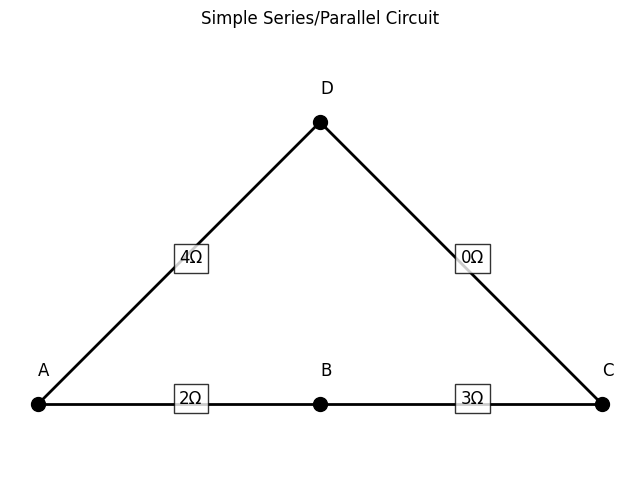

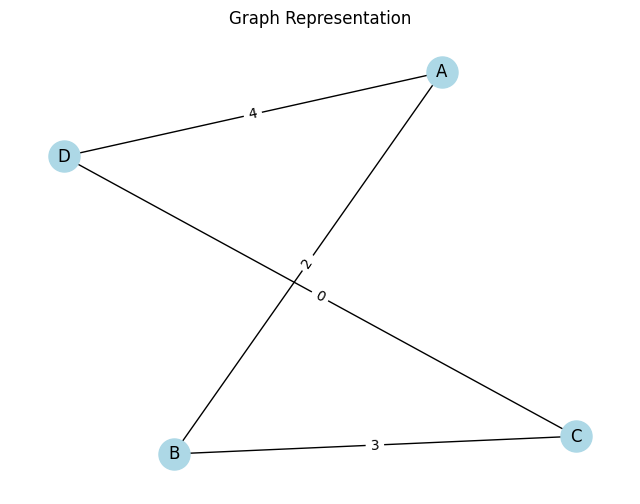

Case Study 2: Nested Combination Circuit
Description: R1 in series with (R2 parallel R3), then parallel with R4


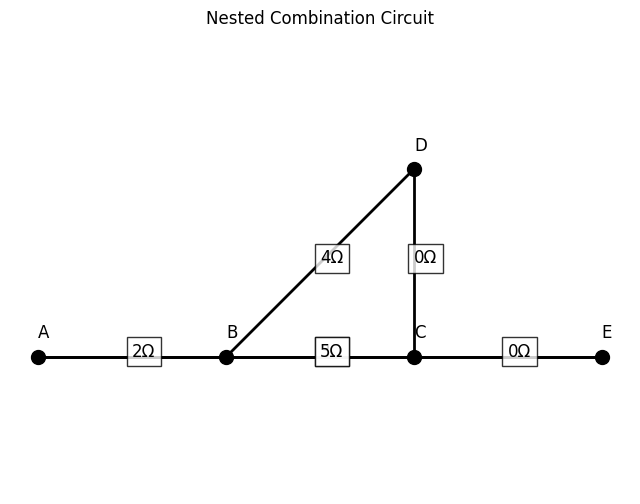

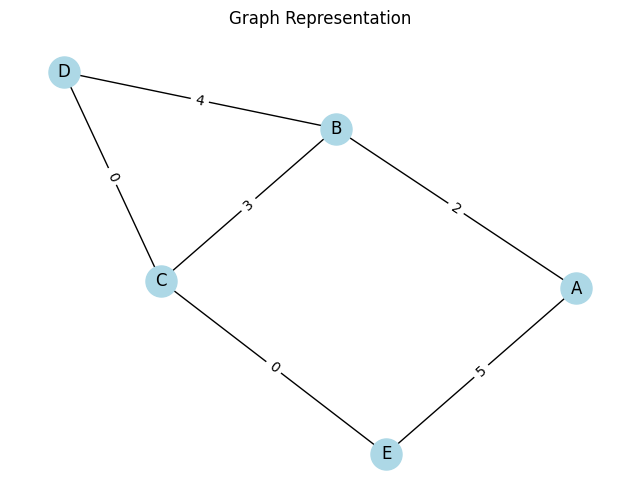

Case Study 3: Wheatstone Bridge
Description: R1, R2, R3, R4 in a bridge configuration with R5 across


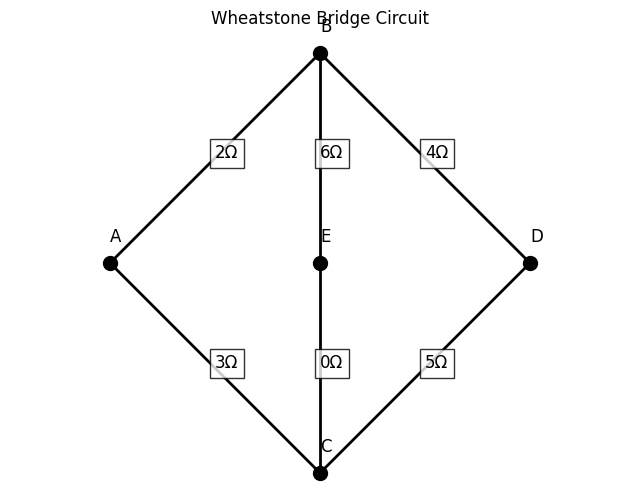

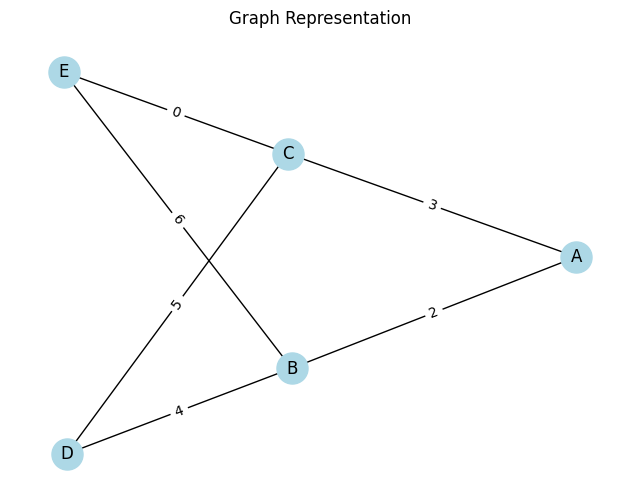

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_circuit_diagram(positions, edges, resistances, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for (start, end), r in zip(edges, resistances):
        x = [positions[start][0], positions[end][0]]
        y = [positions[start][1], positions[end][1]]
        ax.plot(x, y, 'k-', lw=2)
        mid_x, mid_y = (x[0] + x[1]) / 2, (y[0] + y[1]) / 2
        ax.text(mid_x, mid_y, f'{r}Ω', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    for node, (x, y) in positions.items():
        ax.plot(x, y, 'o', ms=10, color='black')
        ax.text(x, y + 0.1, node, fontsize=12)
    ax.set_title(title)
    ax.axis('equal')
    ax.axis('off')
    plt.show()

def draw_graph(G, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'resistance')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    ax.set_title(title)
    plt.show()

# Case Study 1: Simple Series/Parallel
def simple_series_parallel():
    print("Case Study 1: Simple Series/Parallel Circuit")
    print("Description: R1 and R2 in series, in parallel with R3")

    # Circuit Diagram
    positions = {'A': (0, 0), 'B': (1, 0), 'C': (2, 0), 'D': (1, 1)}
    edges = [('A', 'B'), ('B', 'C'), ('A', 'D'), ('D', 'C')]
    resistances = [2, 3, 4, 0]  # 0 for wire
    draw_circuit_diagram(positions, edges, resistances, "Simple Series/Parallel Circuit")

    # Graph Representation
    G = nx.Graph()
    G.add_edge('A', 'B', resistance=2)
    G.add_edge('B', 'C', resistance=3)
    G.add_edge('A', 'D', resistance=4)
    G.add_edge('D', 'C', resistance=0)
    draw_graph(G, "Graph Representation")

# Case Study 2: Nested Combination
def nested_combination():
    print("Case Study 2: Nested Combination Circuit")
    print("Description: R1 in series with (R2 parallel R3), then parallel with R4")

    # Circuit Diagram
    positions = {'A': (0, 0), 'B': (1, 0), 'C': (2, 0), 'D': (2, 1), 'E': (3, 0)}
    edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('D', 'C'), ('C', 'E'), ('A', 'E')]
    resistances = [2, 3, 4, 0, 0, 5]
    draw_circuit_diagram(positions, edges, resistances, "Nested Combination Circuit")

    # Graph Representation
    G = nx.Graph()
    G.add_edge('A', 'B', resistance=2)
    G.add_edge('B', 'C', resistance=3)
    G.add_edge('B', 'D', resistance=4)
    G.add_edge('D', 'C', resistance=0)
    G.add_edge('C', 'E', resistance=0)
    G.add_edge('A', 'E', resistance=5)
    draw_graph(G, "Graph Representation")

# Case Study 3: Wheatstone Bridge
def wheatstone_bridge():
    print("Case Study 3: Wheatstone Bridge")
    print("Description: R1, R2, R3, R4 in a bridge configuration with R5 across")

    # Circuit Diagram
    positions = {'A': (0, 0), 'B': (1, 1), 'C': (1, -1), 'D': (2, 0), 'E': (1, 0)}
    edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('B', 'E'), ('E', 'C')]
    resistances = [2, 3, 4, 5, 6, 0]
    draw_circuit_diagram(positions, edges, resistances, "Wheatstone Bridge Circuit")

    # Graph Representation
    G = nx.Graph()
    G.add_edge('A', 'B', resistance=2)
    G.add_edge('A', 'C', resistance=3)
    G.add_edge('B', 'D', resistance=4)
    G.add_edge('C', 'D', resistance=5)
    G.add_edge('B', 'E', resistance=6)
    G.add_edge('E', 'C', resistance=0)
    draw_graph(G, "Graph Representation")

# Main Execution
def main():
    simple_series_parallel()
    nested_combination()
    wheatstone_bridge()

if __name__ == "__main__":
    main()